# Sklearn Tutorial
## [Python Machine Learning Tutorial, Scikit-Learn: Wine Snob Edition](https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## 1 Load Data
加载数据，pandas库提供的read_csv()函数可从url获取数据。

In [36]:
# Load from remote url with pd.read_csv()

dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

In [37]:
# Preview
print(data.shape)
display(data.head())
display(data.describe())
data.alcohol

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

## 2 Split data into training and test sets
Splitting the data into training and test sets at the beginning of your modeling workflow is crucial for getting a realistic estimate of your model's performance.

将数据分裂为训练集和测试集，这是在建模工作开始之前非常重要的一步。
在本例中，'quality'是我们的目标特征。

首先，分离目标特征(y)以及输入特征(X)：

In [47]:
y = data.quality
X = data.drop('quality', axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123,
                                                    stratify=y)

此处关于参数 `stratify` ：

比单独使用train_test_split来划分数据更严谨

**stratify是为了保持split前类的分布。**

比如有100个数据，80个属于A类(如0），20个属于B类(如1)。

如果train_test_split(... test_size=0.25, stratify = y), 那么split之后数据如下： 

train: 75个数据，其中60个属于A类，15个属于B类。 

test: 25个数据，其中20个属于A类，5个属于B类。 

stratify参数置y，train集和test集的类的比例是 A：B= 4：1，等同于split前的比例（80：20）。

通常在这种类分布不平衡的情况下会用到stratify。



## 3 Data Preprocessing

### 3.1 Manually with Transform API preprocessing.StandardScaler()
1. Fit the transformer on the training set (saving the means and standard deviations)
2. Apply the transformer to the training set (scaling the training data)
3. Apply the transformer to the test set (using the same means and standard deviations)

注意，我们将使用训练集的mean, std对测试集进行变换(transform)，因此：

变换后**训练集**的mean  = 0, std  = 1;

变换后**测试集**的mean != 0, std != 1。

In [70]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [71]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [72]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


### 3.2 Use pipeline technique - make_pipeline()
In practice, when we set up the cross-validation pipeline, we won't even need to manually fit the Transformer API. Instead, we'll simply declare the class object, like so:

In [74]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

This is exactly what it looks like: a modeling pipeline that first transforms the data using StandardScaler() and then fits a model using a random forest regressor.

## 4 Tune Hyperparameters with CV(Cross-Validation)

### 4.1 超参数

有别于模型参数：

模型参数可以在训练过程中直接进行学习；

而超参数需要人为设定并调整(Tune)。

### 4.2 CV
Cross-validation is a process for reliably estimating the performance of a method for building a model by training and evaluating your model multiple times using the same method.
1. Split your data into k equal parts, or "folds" (typically k=10).
2. Train your model on k-1 folds (e.g. the first 9 folds).
3. Evaluate it on the remaining "hold-out" fold (e.g. the 10th fold).
4. Perform steps (2) and (3) k times, each time holding out a different fold.
5. Aggregate the performance across all k folds. This is your performance metric.

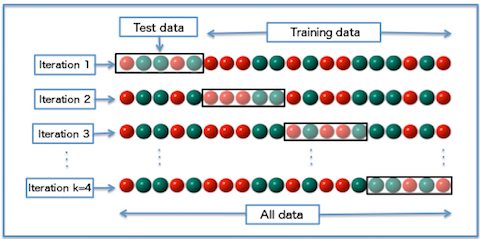

### 4.3 Importance of CV
1. CV仅仅使用训练集对模型进行选择；
2. 在使用CV训练满意后，还可以使用测试集在众多模型中再次选择。

### 4.4 CV pipeline
The best practice when performing CV is to include your data preprocessing steps inside the cross-validation loop. This prevents accidentally tainting your training folds with influential data from your test fold.

Here's how the CV pipeline looks after including preprocessing steps:
1. Split your data into k equal parts, or "folds" (typically k=10).
1. Preprocess k-1 training folds.
2. Train your model on the same k-1 folds.
3. Preprocess the hold-out fold using the same transformations from step (2).
4. Evaluate your model on the same hold-out fold.
5. Perform steps (2) - (5) k times, each time holding out a different fold.
6. Aggregate the performance across all k folds. This is your performance metric.


In [75]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False))], 'verbose': False, 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
           

In [77]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [78]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split

In [79]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto'}


In [80]:
print(clf.refit)

True


## 5 Evaluate model pipeline on test data

Generate the prediction by clf.predict()

In [81]:
prediction = clf.predict(X_test)

Evaluate the prediction by two metrics: r2_score() and mean_squared_error()

In [82]:
print(r2_score(y_test, prediction))

print(mean_squared_error(y_test, prediction))

0.46321448029541745
0.3463734375


## 6 How to decide if the model is good enough?

采用以下三种策略的组合来判断：

1. Start with the goal of the model. If the model is tied to a business problem, have you successfully solved the problem?
2. Look in academic literature to get a sense of the current performance benchmarks for specific types of data.
3. Try to find low-hanging fruit in terms of ways to improve your model.
---
即，
1. 从设计模型的目的出发：若该模型是为了解决商业/经济问题设计的，那么现在的结果解决了问题吗？
2. 查阅学术资料，为当前的表现找到一个合适的基准值。
3. 试试寻找能够优化模型的、容易实现的方法。
---

同时，有以下几种简单的尝试方法可以用来优化模型：
1. Try other regression model families (e.g. regularized regression, boosted trees, etc.).
2. Collect more data if it's cheap to do so.
3. Engineer smarter features after spending more time on exploratory analysis.
4. Speak to a domain expert to get more context (...this is a good excuse to go wine tasting!).

## 7 Save the model

使用 joblib 包来保存模型，joblib包是python pickle包的一个优化版本，效率更高，且对numpy数组的亲和性更高。

### 7.1 Save

In [84]:
joblib.dump(clf, 'tutorial_rf_regressor.pkl');

### 7.2 Load and reuse

In [87]:
clf_loaded= joblib.load('tutorial_rf_regressor.pkl')

prediction_loaded = clf_loaded.predict(X_test)

print(r2_score(y_test, prediction_loaded))
print(mean_squared_error(y_test, prediction_loaded))

0.46321448029541745
0.3463734375


## Next - scikit-learn Tutorials - Further Study 